<a href="https://colab.research.google.com/github/PavelNovikov888/classification_NBC/blob/master/%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_%D0%91%D0%B0%D0%B9%D0%B5%D1%81_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B4%D0%BE%D1%85%D0%BE%D0%B4%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install bambi
!pip install arviz

In [17]:
# import arviz as az
# import bambi as bmb
# import pandas as pd

In [18]:
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from scipy.special import expit as invlogit

# Disable a FutureWarning in ArviZ at the moment of running the notebook
az.style.use("arviz-darkgrid")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [19]:
raw_data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    header=None,
    names=[
        "age",
        "workclass",
        "fnlwgt",
        "education-categorical",
        "educ",
        "marital-status",
        "occupation",
        "relationship",
        "race",
        "sex",
        "captial-gain",
        "capital-loss",
        "hours",
        "native-country",
        "income",
    ],
)

In [20]:
raw_data.head(10)

,age,workclass,fnlwgt,education-categorical,educ,marital-status,occupation,relationship,race,sex,captial-gain,capital-loss,hours,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [21]:
data = raw_data[~pd.isnull(raw_data["income"])]

In [22]:
data.head(3)

,age,workclass,fnlwgt,education-categorical,educ,marital-status,occupation,relationship,race,sex,captial-gain,capital-loss,hours,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [23]:
data[data["native-country"] == " United-States"].sample(5)

,age,workclass,fnlwgt,education-categorical,educ,marital-status,occupation,relationship,race,sex,captial-gain,capital-loss,hours,native-country,income
18675,30,Self-emp-not-inc,166961,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
25418,39,Private,120074,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
7545,31,Private,261943,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
25919,53,Private,91911,HS-grad,9,Divorced,Craft-repair,Unmarried,Black,Female,0,0,48,United-States,<=50K
7518,50,Private,200618,Assoc-acdm,12,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [24]:
income = 1 * (data["income"] == " >50K")

In [25]:
data = data[["age", "educ", "hours","marital-status"]]

# Scale age by 10, it helps with model convergence.
data["age"] = data["age"] / 10.0
data["age2"] = np.square(data["age"])
data["income"] = income

income.value_counts()

<ipython-input-25-a82fb7b2c5fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["age"] = data["age"] / 10.0
<ipython-input-25-a82fb7b2c5fa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["age2"] = np.square(data["age"])
<ipython-input-25-a82fb7b2c5fa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

0    24720
1     7841
Name: income, dtype: int64

In [26]:
data.head(3)

,age,educ,hours,marital-status,age2,income
0,3.9,13,40,Never-married,15.21,0
1,5.0,13,13,Married-civ-spouse,25.00,0
2,3.8,9,40,Divorced,14.44,0


In [27]:
def replace_marital(marital):
    if 'married' in marital.lower():
        return 4
    elif 'single' in marital.lower():
        return 3
    elif 'divorced' in marital.lower():
        return 2
    elif 'unknown' in marital.lower():
        return 1

data['marital'] = data["marital-status"].apply(lambda x: replace_marital(x))

data['marital'].fillna(1, inplace=True)

<ipython-input-27-903e69d39f1f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['marital'] = data["marital-status"].apply(lambda x: replace_marital(x))
<ipython-input-27-903e69d39f1f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['marital'].fillna(1, inplace=True)


In [28]:
data.head(3)

,age,educ,hours,marital-status,age2,income,marital
0,3.9,13,40,Never-married,15.21,0,4.0
1,5.0,13,13,Married-civ-spouse,25.00,0,4.0
2,3.8,9,40,Divorced,14.44,0,2.0


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-1.450,0.019,-1.485,-1.414,0.001,0.0,1269.0,1193.0,1.00
age,0.366,0.008,0.351,0.382,0.000,0.0,823.0,753.0,1.00
age2,-0.033,0.001,-0.035,-0.031,0.000,0.0,821.0,712.0,1.00
marital,0.102,0.002,0.098,0.106,0.000,0.0,1922.0,1298.0,1.00
educ,0.046,0.001,0.045,0.048,0.000,0.0,1399.0,1202.0,1.00
income_sigma,0.374,0.001,0.372,0.377,0.000,0.0,1400.0,1325.0,1.01


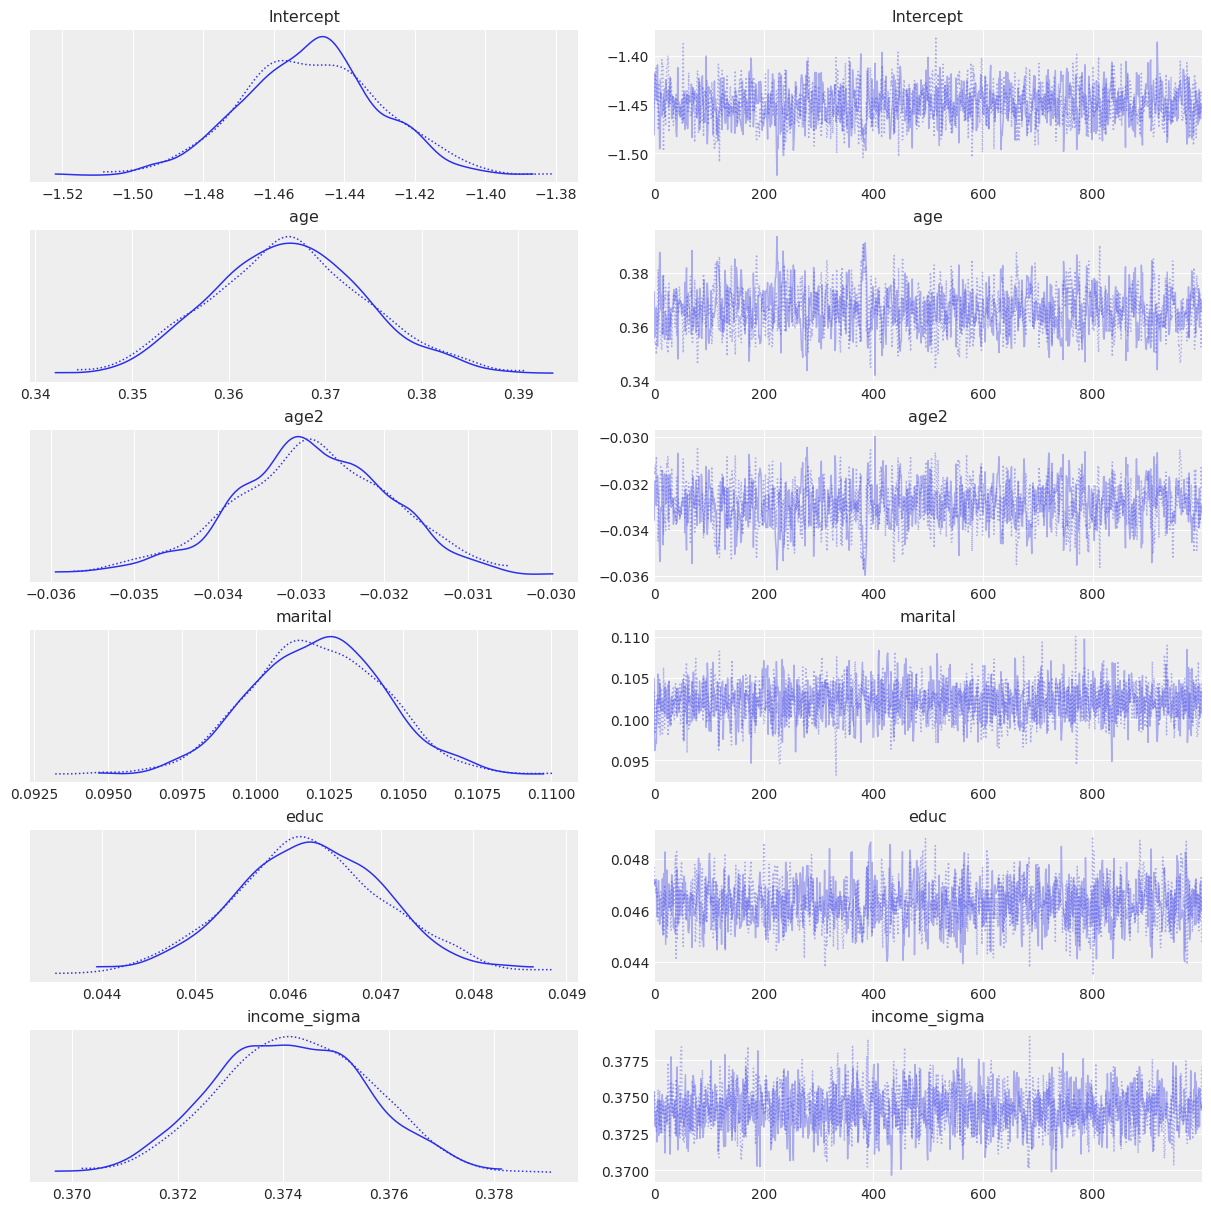

In [29]:
model = bmb.Model('income ~ age + age2 + marital + educ ', data)
# Fit the model using 1000 on each of 4 chains
# results = model.fit(draws=1000, chains=4)
results = model.fit(draws=1000)

# Use ArviZ to plot the results
az.plot_trace(results)

# Key summary and diagnostic info on the model parameters
az.summary(results)

In [30]:
from __future__ import annotations

import warnings

from typing import TYPE_CHECKING, Any, Callable

# import matplotlib.pyplot as plt
# import numpy as np

from pymc.backends.base import MultiTrace

if TYPE_CHECKING:
    from arviz.data.inference_data import InferenceData


def plot_posterior_predictive_glm(
    trace: InferenceData | MultiTrace,
    eval: np.ndarray | None = None,
    lm: Callable | None = None,
    samples: int = 30,
    **kwargs: Any
) -> None:
    """
    Построение апостериорного предсказания линейной модели.

    Параметры
    ----------
    trace: InferenceData или MultiTrace
        Выходные данные pm.sample()
    eval: <array>
        Массив, над которым будет производиться оценка lm
    lm: функция <default: линейная функция>
        Функция, отображающая параметры в различных точках
        к соответствующим выходам.
        input: point, sample
        output: estimated value
    samples: int <default=30>
        Сколько апостериорных выборок нужно построить.
    kwargs : mapping,  optional
        Дополнительные аргументы в виде ключевых слов, передаваемые в ``matplotlib.pyplot.plot()``.

    Plot posterior predictive of a linear model.

    Parameters
    ----------
    trace: InferenceData or MultiTrace
        Output of pm.sample()
    eval: <array>
        Array over which to evaluate lm
    lm: function <default: linear function>
        Function mapping parameters at different points
        to their respective outputs.
        input: point, sample
        output: estimated value
    samples: int <default=30>
        How many posterior samples to draw.
    kwargs : mapping, optional
        Additional keyword arguments are passed to ``matplotlib.pyplot.plot()``.
    """
    if lm is None:
        lm = lambda x, sample: sample["Intercept"] + sample["x"] * x

    if eval is None:
        eval = np.linspace(0, 1, 100)

    # Set default plotting arguments
    if "lw" not in kwargs and "linewidth" not in kwargs:
        kwargs["lw"] = 0.2
    if "c" not in kwargs and "color" not in kwargs:
        kwargs["c"] = "k"

    if not isinstance(trace, MultiTrace):
        trace = trace.posterior.to_dataframe().to_dict(orient="records")

    for rand_loc in np.random.randint(0, len(trace), samples):
        rand_sample = trace[rand_loc]
        plt.plot(eval, lm(eval, rand_sample), **kwargs)
        # Make sure to not plot label multiple times
        kwargs.pop("label", None)

    plt.title("Posterior predictive")

In [43]:
results.posterior['educ'][1]

<xarray.DataArray 'educ' (draw: 1000)>
array([0.04768014, 0.04699951, 0.04710183, 0.04667132, 0.04684866,
       0.04646792, 0.04669595, 0.04560356, 0.04604857, 0.04600103,
       0.04656106, 0.04660157, 0.04672217, 0.04650887, 0.04622027,
       0.04525102, 0.04544085, 0.04664321, 0.0450986 , 0.04698784,
       0.04618053, 0.04669096, 0.0460534 , 0.04492219, 0.04501015,
       0.0458691 , 0.04585996, 0.04630255, 0.04675256, 0.04616209,
       0.0453252 , 0.04523918, 0.04718328, 0.04656088, 0.04617178,
       0.04703996, 0.04626239, 0.04633285, 0.04776674, 0.04811969,
       0.04409426, 0.0482768 , 0.04485206, 0.04568217, 0.04680125,
       0.04721409, 0.04553488, 0.04575763, 0.04664834, 0.04772769,
       0.04789957, 0.04729535, 0.04559008, 0.04461573, 0.04661004,
       0.04628723, 0.04668657, 0.04579614, 0.04563281, 0.04614348,
       0.046752  , 0.04661107, 0.0465363 , 0.04594411, 0.04654408,
       0.04641228, 0.04578454, 0.04709734, 0.04640993, 0.04635514,
       0.04725925, 0.04613827, 0.04653566, 0.04621582, 0.04777843,
       0.04476847, 0.04490315, 0.04754309, 0.04557942, 0.04649167,
       0.04688996, 0.04741875, 0.04657681, 0.04462309, 0.04785354,
       0.04645846, 0.04649034, 0.04724379, 0.04761409, 0.0455065 ,
       0.04581283, 0.04586539, 0.04510347, 0.04727109, 0.04642552,
       0.04693181, 0.04551792, 0.04566197, 0.04709871, 0.047118  ,
...
       0.04730591, 0.04699411, 0.04616052, 0.0473754 , 0.04638347,
       0.04596839, 0.04629411, 0.04733375, 0.04667799, 0.0448956 ,
       0.04524764, 0.04529663, 0.04572807, 0.04603136, 0.04536491,
       0.04768199, 0.04634457, 0.04639493, 0.0452591 , 0.04559515,
       0.04611349, 0.04696352, 0.04561861, 0.04501009, 0.04456356,
       0.04484527, 0.0454032 , 0.04715021, 0.04806824, 0.04774892,
       0.04738757, 0.04765824, 0.04640005, 0.04513837, 0.04602113,
       0.04638058, 0.04552322, 0.04536168, 0.04713578, 0.04697623,
       0.0451204 , 0.04582325, 0.04683586, 0.04494622, 0.0471446 ,
       0.04694902, 0.04494767, 0.0448667 , 0.0464537 , 0.04536218,
       0.04685412, 0.04549588, 0.04608361, 0.04727446, 0.04508085,
       0.04541434, 0.04605806, 0.04715579, 0.04728703, 0.0468606 ,
       0.0465173 , 0.04824965, 0.04764422, 0.04772963, 0.04800551,
       0.04610827, 0.04652142, 0.0461734 , 0.04620597, 0.04441668,
       0.0477586 , 0.04868013, 0.04391585, 0.04412971, 0.04597173,
       0.0466684 , 0.04568767, 0.04718586, 0.04664309, 0.04580582,
       0.04674797, 0.04640012, 0.04516183, 0.04570225, 0.04682847,
       0.04613124, 0.04640847, 0.04701336, 0.04614676, 0.04727302,
       0.04631936, 0.04649199, 0.04661463, 0.04558972, 0.0452192 ,
       0.04658394, 0.04556036, 0.04697672, 0.04727429, 0.04479156])
Coordinates:
    chain    int64 1
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999

In [31]:
trace = results

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1760: UserWarning: The figure layout has changed to tight
  f.tight_layout()
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1761: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  f.subplots_adjust(hspace=space, wspace=space)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  func(*args, **kwargs)


<Figure size 900x700 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


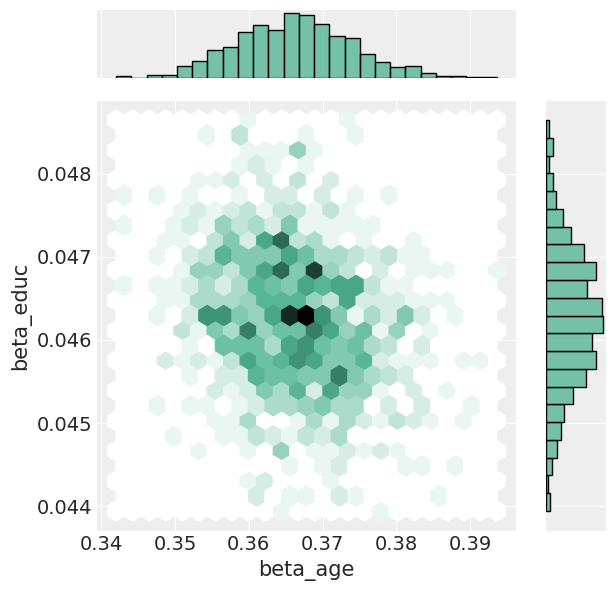

In [60]:
plt.figure(figsize=(9, 7))
sns.jointplot(x = trace.posterior["age"][0], y =  trace.posterior["educ"][0],  kind="hex", color="#4CB391")
plt.xlabel("beta_age")
plt.ylabel("beta_educ");

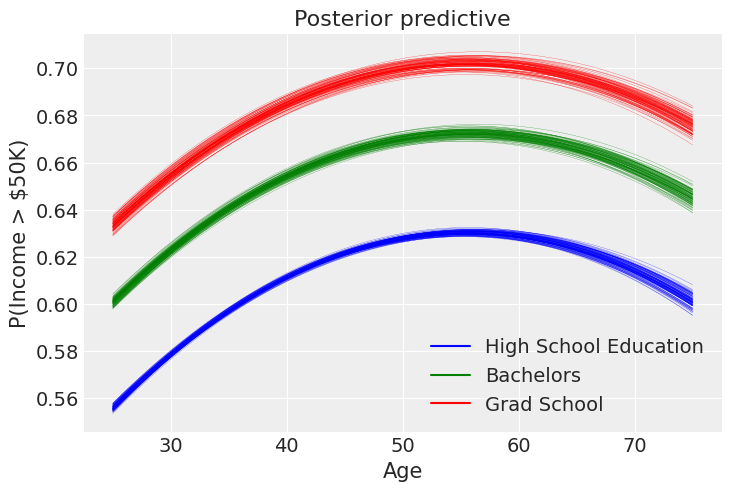

In [45]:
def lm_full(trace, age, education, marital):
    shape = np.broadcast(age, education, marital).shape
    x_norm = np.asarray([np.broadcast_to(x, shape) for x in [age/10., education, marital]])

    return 1 / (1 + np.exp(-(trace['Intercept'] +
                             trace['age']*x_norm[0] +
                             trace['age2']*(x_norm[0]**2) +
                             trace['educ']*x_norm[1] +
                             trace['marital']*x_norm[2])))

lm = lambda x, samples: lm_full(samples, x, 12., 4.)
lm2 = lambda x, samples: lm_full(samples, x, 16., 4.)
lm3 = lambda x, samples: lm_full(samples, x, 19., 4.)


plot_posterior_predictive_glm(trace, eval=np.linspace(25,75,1000), lm=lm, samples=100, color='blue', alpha=.8)
plot_posterior_predictive_glm(trace, eval=np.linspace(25,75,1000), lm=lm2, samples=100, color='green', alpha=.8)
plot_posterior_predictive_glm(trace, eval=np.linspace(25,75,1000), lm=lm3, samples=100, color='red', alpha=.8)

blue_line = mlines.Line2D(["lm"], [], color="b", label="High School Education")
green_line = mlines.Line2D(["lm2"], [], color="g", label="Bachelors")
red_line = mlines.Line2D(["lm3"], [], color="r", label="Grad School")
plt.legend(handles=[blue_line, green_line, red_line], loc="lower right")
plt.ylabel("P(Income > $50K)")
plt.xlabel("Age")
plt.show();

In [46]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-1.450,0.019,-1.485,-1.414,0.001,0.0,1269.0,1193.0,1.00
age,0.366,0.008,0.351,0.382,0.000,0.0,823.0,753.0,1.00
age2,-0.033,0.001,-0.035,-0.031,0.000,0.0,821.0,712.0,1.00
marital,0.102,0.002,0.098,0.106,0.000,0.0,1922.0,1298.0,1.00
educ,0.046,0.001,0.045,0.048,0.000,0.0,1399.0,1202.0,1.00
income_sigma,0.374,0.001,0.372,0.377,0.000,0.0,1400.0,1325.0,1.01


In [47]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(data[['age', 'educ',  'age2', 'marital']], data['income'])

LogisticRegression()

In [48]:
lr.intercept_

array([-16.26445812])

In [49]:
pd.DataFrame(lr.coef_[0], index=['age', 'educ',  'age2', 'marital'])

,0
age,3.669533
educ,0.335039
age2,-0.349695
marital,0.803746
